![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

![image](image.png)

image thanks to:https://www.google.com/url?sa=i&url=https%3A%2F%2Ftwitter.com%2Fallison_horst%2Fstatus%2F1270046411002753025&psig=AOvVaw3crXc1laiozNOduQLLQbvf&ust=1711246227729000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCNDPqo6niYUDFQAAAAAdAAAAABAi

In [50]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [51]:
penguins_df.sample(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
289,50.7,15.0,223.0,5550.0,MALE
314,44.5,14.7,214.0,4850.0,FEMALE
303,50.0,15.9,224.0,5350.0,MALE
62,37.6,17.0,185.0,3600.0,FEMALE
281,46.2,14.9,221.0,5300.0,MALE


In [52]:
penguins_df.shape

(344, 5)

In [53]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [54]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [55]:
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [56]:
df_num = penguins_df.select_dtypes(include=['number'])
df_clas = penguins_df.select_dtypes(include=['object'])

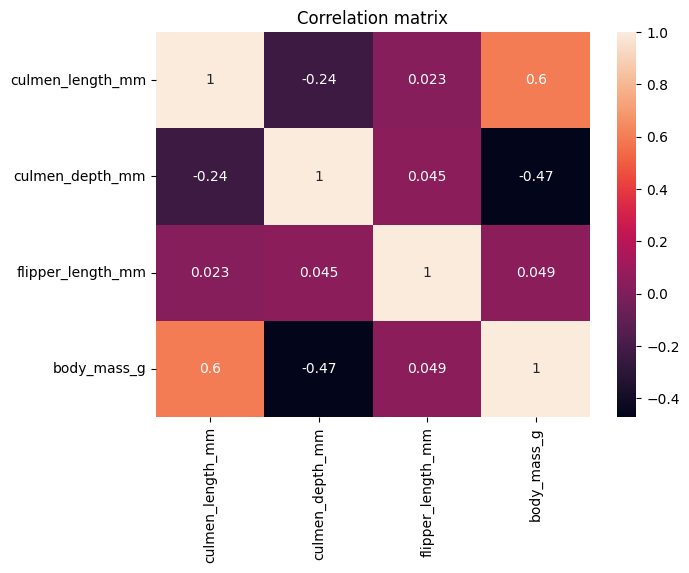

In [57]:
plt.figure(figsize=(7,5))
sns.heatmap(df_num.corr(), annot=True)
plt.title('Correlation matrix')
plt.show()

<Figure size 1000x700 with 0 Axes>

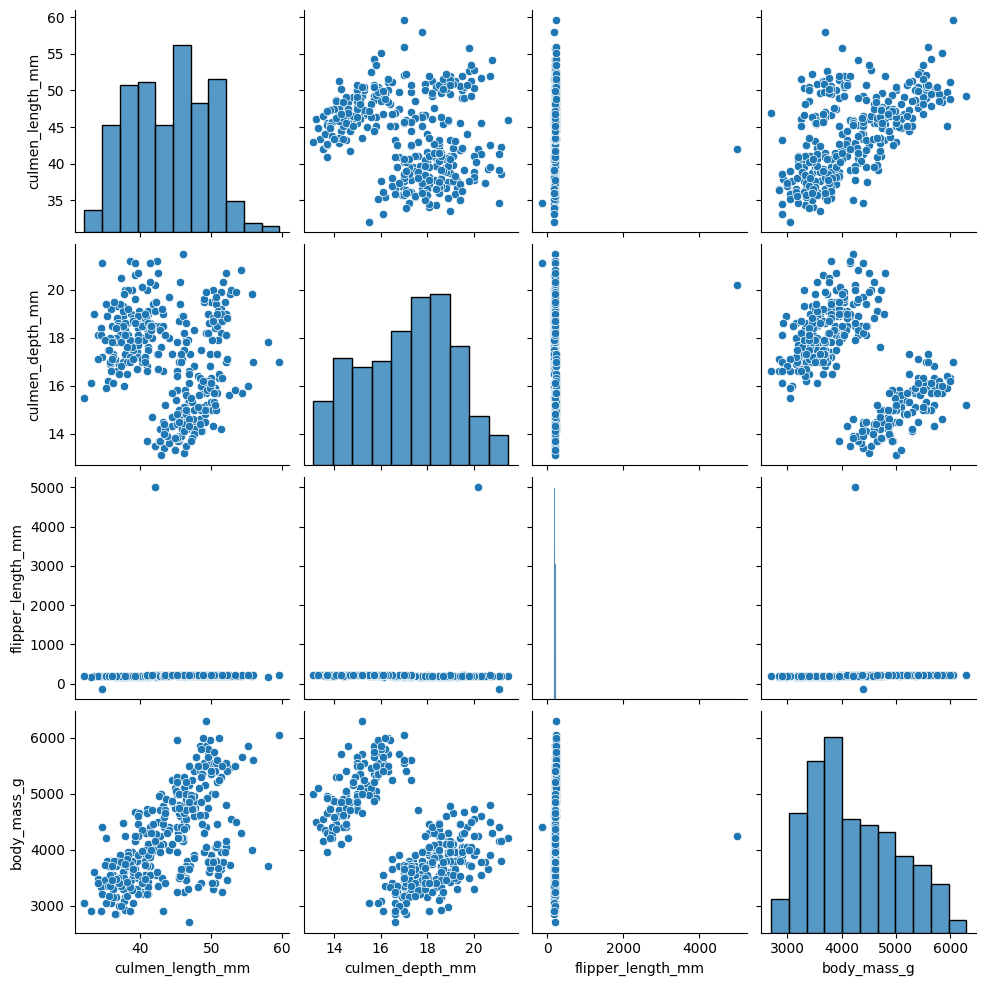

In [58]:
plt.figure(figsize=(10,7))
sns.pairplot(df_num)
plt.show()

Text(0.5, 1.0, 'body mass by sex')

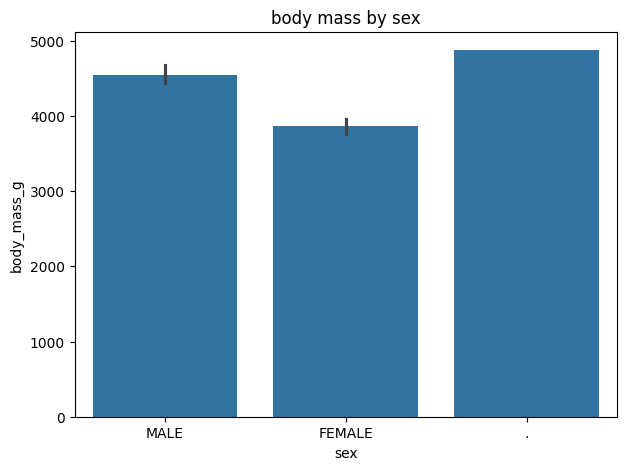

In [59]:
#plotting to explore the data, and we see the first aanomaly
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='body_mass_g', data=penguins_df)
plt.title('body mass by sex')

In [60]:
#the anomaly still
penguins_df.groupby(by='sex')['body_mass_g'].mean()

sex
.         4875.000000
FEMALE    3862.272727
MALE      4543.934911
Name: body_mass_g, dtype: float64

Investigating the presence of three different categories in the 'sex' column, including the occurrence of a non-standard representation as a dot ('.') symbol.

In [61]:
unknow_value = penguins_df[penguins_df['sex']=='.']
unknow_value

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


Upon further examination, we observed that the third type with the dot representation exists in only a single row. As a result, we can confidently proceed to drop this particular row from the dataset.

In [62]:
penguins_df = penguins_df[penguins_df['sex'] != '.']
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


now we can follow the analisys

In [63]:
penguins_df.groupby(by='sex')['body_mass_g'].mean()

sex
FEMALE    3862.272727
MALE      4543.934911
Name: body_mass_g, dtype: float64

Text(0.5, 1.0, 'Body mass by sex')

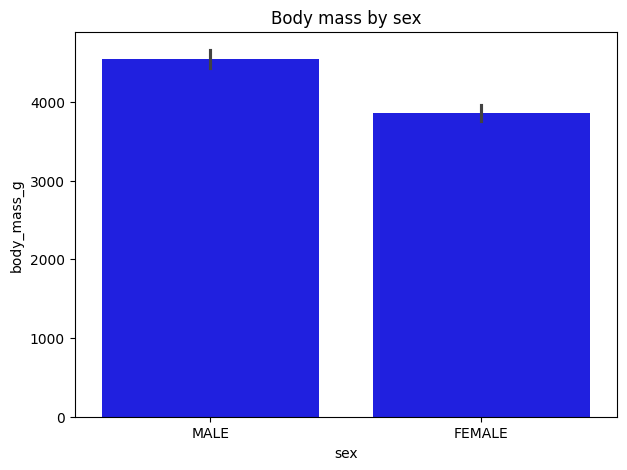

In [65]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='body_mass_g', data=penguins_df, color='Blue')
plt.title('Body mass by sex')

In [30]:
penguins_df.groupby(by='sex')['flipper_length_mm'].mean()

sex
FEMALE    197.363636
MALE      230.928994
Name: flipper_length_mm, dtype: float64

Text(0.5, 1.0, 'Flipper length by sex')

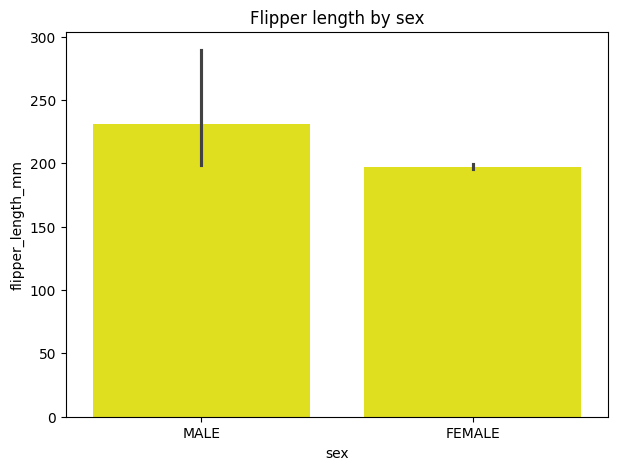

In [72]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='flipper_length_mm', data=penguins_df, color='yellow')
plt.title('Flipper length by sex')

In [38]:
penguins_df.groupby(by='sex')['culmen_depth_mm'].mean()

sex
FEMALE    16.425455
MALE      17.904734
Name: culmen_depth_mm, dtype: float64

Text(0.5, 1.0, 'Culmen depth by sex')

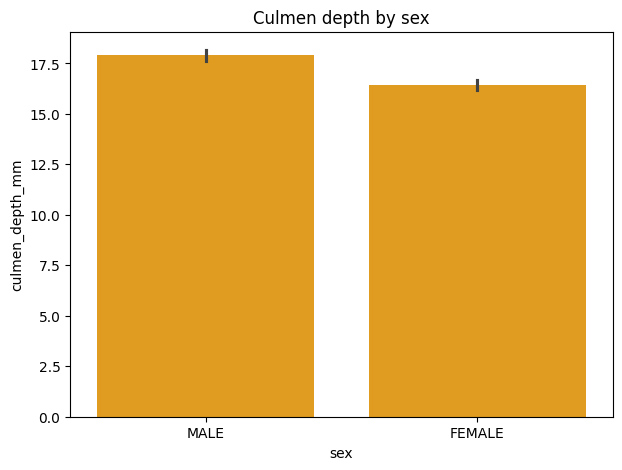

In [71]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='culmen_depth_mm', data=penguins_df, color='Orange')
plt.title('Culmen depth by sex')

In [43]:
penguins_df.groupby(by='sex')['culmen_length_mm'].mean()

sex
FEMALE    42.096970
MALE      45.831953
Name: culmen_length_mm, dtype: float64

Text(0.5, 1.0, 'Culmen length by sex')

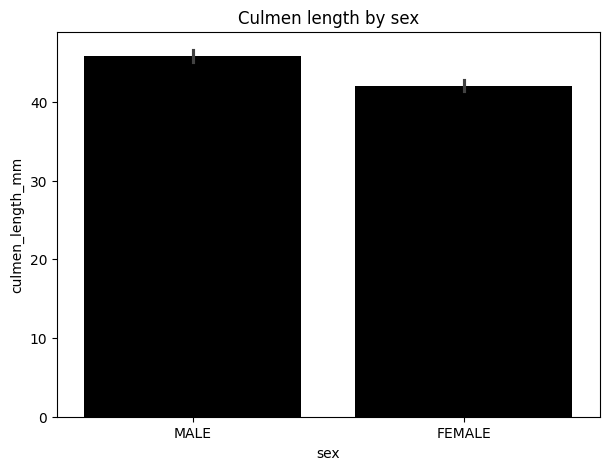

In [69]:
plt.figure(figsize=(7,5))
sns.barplot(x='sex', y='culmen_length_mm', data=penguins_df, color='black')
plt.title('Culmen length by sex')